<a href="https://colab.research.google.com/github/vvrgit/NLP-LAB/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'imdb-dataset-of-50k-movie-reviews' dataset.
Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [ ]:
import pandas as pd
import nltk
import re
import string
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation & numbers
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


In [ ]:
nltk.download('punkt_tab')
df['clean_review'] = df['review'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
positive_reviews = df[df['sentiment'] == 'positive']['clean_review']
negative_reviews = df[df['sentiment'] == 'negative']['clean_review']


It creates a TF-IDF feature extractor that converts text documents into numerical vectors, keeping only the top 5000 most important words.

In [ ]:
tfidf_pos = TfidfVectorizer(max_features=5000)
tfidf_neg = TfidfVectorizer(max_features=5000)

tfidf_pos_matrix = tfidf_pos.fit_transform(positive_reviews)
tfidf_neg_matrix = tfidf_neg.fit_transform(negative_reviews)


In [ ]:
def get_top_tfidf_words(tfidf_matrix, feature_names, top_n=15):
    scores = tfidf_matrix.mean(axis=0).A1
    words_scores = list(zip(feature_names, scores))
    sorted_words = sorted(words_scores, key=lambda x: x[1], reverse=True)
    return sorted_words[:top_n]


In [ ]:
top_pos_words = get_top_tfidf_words(tfidf_pos_matrix, tfidf_pos.get_feature_names_out())
top_neg_words = get_top_tfidf_words(tfidf_neg_matrix, tfidf_neg.get_feature_names_out())

print("Top 15 Positive Review Words:")
print(top_pos_words)

print("\nTop 15 Negative Review Words:")
print(top_neg_words)


Top 15 Positive Review Words:
[('movie', np.float64(0.05299356873320211)), ('film', np.float64(0.04970129722858898)), ('one', np.float64(0.03215530351302243)), ('like', np.float64(0.025679416592673813)), ('good', np.float64(0.024891656402122323)), ('great', np.float64(0.02375486858263117)), ('story', np.float64(0.02171433034086528)), ('see', np.float64(0.021255276631182336)), ('really', np.float64(0.020251885924648366)), ('time', np.float64(0.0197353972604874)), ('well', np.float64(0.01920753287912486)), ('would', np.float64(0.01838202424514968)), ('love', np.float64(0.017711482353994463)), ('also', np.float64(0.01747140631509081)), ('best', np.float64(0.016777264520257844))]

Top 15 Negative Review Words:
[('movie', np.float64(0.06089556813396965)), ('film', np.float64(0.04662023462710966)), ('one', np.float64(0.03224522531502536)), ('like', np.float64(0.029952446611228836)), ('bad', np.float64(0.026218069306981742)), ('good', np.float64(0.024079042396894658)), ('even', np.float64(0.0

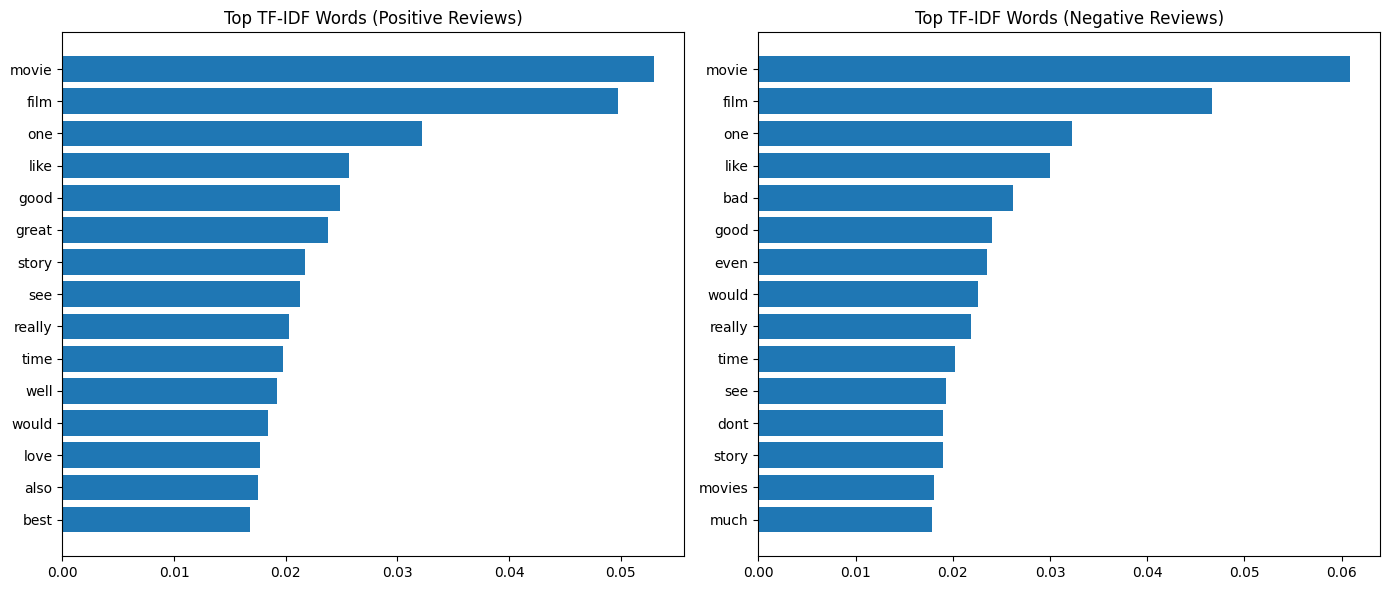

In [ ]:
pos_words, pos_scores = zip(*top_pos_words)
neg_words, neg_scores = zip(*top_neg_words)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.barh(pos_words, pos_scores)
plt.title('Top TF-IDF Words (Positive Reviews)')
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.barh(neg_words, neg_scores)
plt.title('Top TF-IDF Words (Negative Reviews)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
